In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/vehicle data.csv')
df

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79,2625,18.6,1982,ford ranger,11.904024


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [ ]:
df.shape

(398, 9)

In [ ]:
df.describe()

,origin,cylinders,displacement,weight,acceleration,year,Kilometer_per_liter
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,1.572864,5.454774,193.425879,2970.424623,15.568090,1976.010050,9.997073
std,0.802055,1.701004,104.269838,846.841774,2.757689,3.697627,3.322917
min,1.000000,3.000000,68.000000,1613.000000,8.000000,1970.000000,3.826293
25%,1.000000,4.000000,104.250000,2223.750000,13.825000,1973.000000,7.440015
50%,1.000000,4.000000,148.500000,2803.500000,15.500000,1976.000000,9.778305
75%,2.000000,8.000000,262.000000,3608.000000,17.175000,1979.000000,12.329168
max,3.000000,8.000000,455.000000,5140.000000,24.800000,1982.000000,19.811697


In [ ]:
df['origin'].unique()

array([1, 3, 2], dtype=object)

In [ ]:
df['cylinders'].unique()

array([8, 4, 6, 3, 5], dtype=object)

In [ ]:
df['origin']=df['origin'].astype('object')

In [ ]:
df['cylinders']=df['cylinders'].astype('object')

In [ ]:
df['horsepower']=[i.replace('?','-1') for i in df['horsepower']]
df['horsepower']=df['horsepower'].astype('int')
df['horsepower'].replace(-1,df['horsepower'].mean(),inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    object 
 1   cylinders            398 non-null    object 
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    float64
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 28.1+ KB


In [ ]:
df.drop(['name'],inplace = True,axis = 1)

<AxesSubplot:>

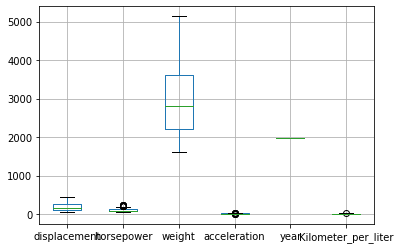

In [ ]:
df.boxplot()

<AxesSubplot:>

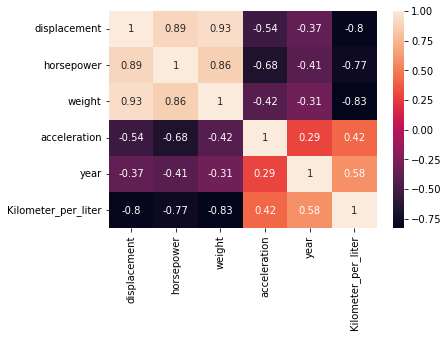

In [ ]:
sns.heatmap(data=df.corr(),annot=True)

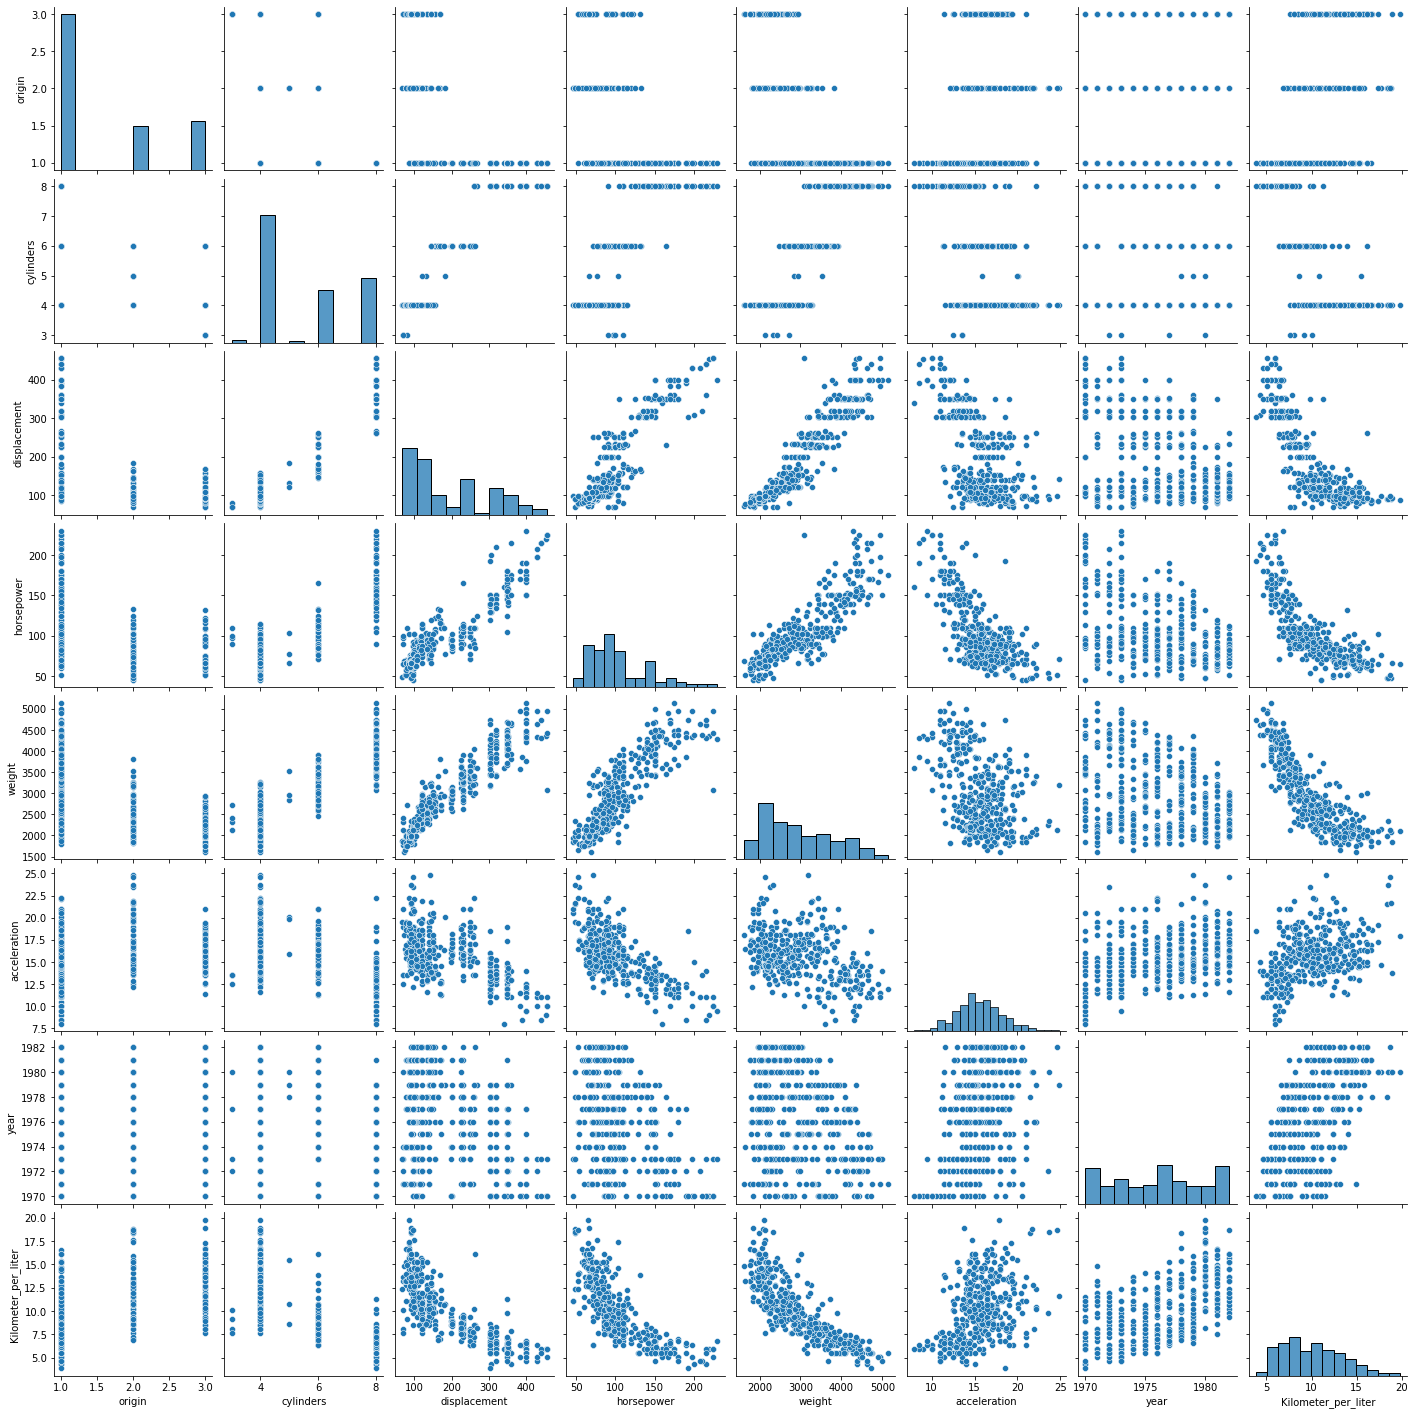

In [ ]:
sns.pairplot(df)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import SGDRegressor      
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [ ]:
x=df.drop(columns='Kilometer_per_liter')
y=df['Kilometer_per_liter']

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=2,test_size=0.25)

In [ ]:
for i in df[['origin','cylinders']].columns:
    le=LabelEncoder()
    xtrain[i]=le.fit_transform(xtrain[i])
    xtest[i]=le.fit_transform(xtest[i])

In [ ]:
loss=['squared_error','huber','epsilon_insensitive','squared_epsilon_insensitive']
penalty=['l1','l2','elasticnet']
alpha=[0.000001,0.00001,0.0001,0.001,0.01,0.1,0.5,1,10,100]
learning_rate=['constant','optimal','invscaling','adaptive']
max_iter=[10,50,100]
eta0=[0.001,0.01,0.1,0.2,0.3,0.4,0.5,1,10,100]
param_distributions=dict(loss=loss,penalty=penalty,alpha=alpha,learning_rate=learning_rate,max_iter=max_iter,eta0=eta0)
sgd=SGDRegressor()
rand=RandomizedSearchCV(estimator=sgd,param_distributions=param_distributions,n_iter=1000)
rand_res=rand.fit(xtrain,ytrain)
print(rand_res.best_score_)
print(rand_res.best_params_)

0.592166067219154
{'penalty': 'l2', 'max_iter': 100, 'loss': 'huber', 'learning_rate': 'optimal', 'eta0': 0.4, 'alpha': 100}


In [ ]:
model=SGDRegressor(penalty= 'l2', max_iter= 100, loss= 'huber', learning_rate= 'adaptive', eta0= 0.5, alpha= 10)
model.fit(xtrain,ytrain)

SGDRegressor(alpha=10, eta0=0.5, learning_rate='adaptive', loss='huber',
             max_iter=100)

In [ ]:
model.predict(xtest)

array([ 2.59546574, 11.48472368, 11.26289599,  8.94537485, 10.82934581,
        3.32647596,  2.91013   ,  4.65888517,  3.80079886,  6.77731059,
        7.0909354 , 10.09000498, 12.16388465,  7.65764302, 11.78947646,
       10.34011473,  7.20820046,  9.8407756 , 12.37381699,  6.62141833,
       10.82235279,  6.78564397, 11.33543101,  9.88235496,  3.60878864,
        5.66561156,  9.71649645,  8.60617592, 11.13733441,  6.40651941,
       12.00079071, 10.88753109,  9.298446  , 11.12523686,  3.69957936,
       11.83552695,  7.64009467, 12.31250451,  3.29065349, 11.41446336,
        6.54169928,  8.00326948,  8.04707328, 10.90001592, 11.02264014,
       11.6462408 ,  5.30535313,  4.01579897, 12.07893716, 10.5216661 ,
       11.30662128,  6.98169026, 10.0641766 ,  9.56829789,  9.79861588,
        3.62180544, 11.35239891,  7.38203463,  4.41465683, 10.65573382,
       11.82474438, 10.07420351, 11.68169897,  5.71252939,  5.82927606,
       12.19887898,  9.44954727,  8.91056125,  3.75132912, 11.78

In [ ]:
model.predict([[2,7,324,178,3574,14,1987]])

array([6.40636955])

In [ ]:
model.predict([[1,5,367,178,3666,16,1999]])

array([6.03143888])